In [2]:
import tqdm
from tqdm import tqdm_notebook, tnrange
import numpy as np
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.utils import img_to_array ,load_img
from skimage.transform import resize
import matplotlib.pyplot as plt

In [3]:
from turtle import width


height = 128
width = 128

In [5]:
X = np.zeros((len(image_ids), height, width, 1), dtype=np.float32)
y = np.zeros((len(image_ids), 1), dtype=np.float32)
len(X)

84

In [6]:
y.shape

(84, 1)

In [4]:
img_array , mask_array = np.load("./data/train_image.npy"), np.load("./data/train_label.npy")

In [6]:
len(img_array)

888

: 

In [43]:
img_array = img_array.astype(np.uint8)
mask_array = mask_array.astype(np.uint8)

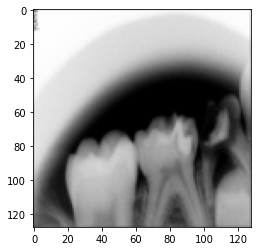

In [44]:
plt.imshow(img_array[0],cmap='gray')

In [45]:
def add_augmented_data(normal_image , aug_image , normal_mask) :
    # print(len(normal_image) , len(aug_image) )
    normal_image = np.append(normal_image , aug_image,axis=0)
    normal_mask = np.append(normal_mask , normal_mask,axis=0)
    return normal_image , normal_mask

In [46]:
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

In [47]:
len(img_array)

888

1776

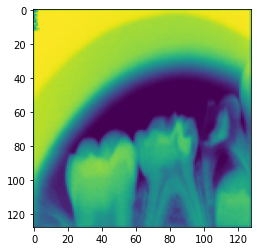

In [48]:
aug = iaa.Sequential([iaa.Fliplr(0.5)])
aug_images = aug(images = img_array)
plt.imshow(aug_images[0])
normal_image , normal_mask = add_augmented_data(img_array , aug_images , mask_array)
len(normal_image)

In [49]:
len(normal_image)

1776

In [25]:
len(normal_mask)

1776

In [ ]:
aug = iaa.Sequential([
    iaa.GammaContrast((1, 2.0),per_channel=True)
    
])
aug_images = aug(images = normal_image)
plt.imshow(aug_images[0])
normal_image , normal_mask = add_augmented_data(normal_image , aug_images , normal_mask)
print(len(normal_image) , len(normal_mask))

In [ ]:
aug = iaa.Sequential([iaa.AveragePooling(2)])
aug_images = aug(images = normal_image)
plt.imshow(aug_images[0],cmap="gray")
normal_image , normal_mask = add_augmented_data(normal_image, aug_images ,normal_mask)
print(len(normal_image) , len(normal_mask))

In [28]:
normal_image = normal_image.astype(dtype="uint8")

In [29]:
img_array[0].shape

(128, 128, 1)

In [61]:
imgss[0].shape

(128, 128, 3)

In [50]:
normal_imgss = [np.dstack((normal_image[i], normal_image[i], normal_image[i])) for i in range(0,len(normal_image))]
# imgss = [np.stack((imgs[i], imgs[i], imgs[i]), axis=2) for i in range(0,len(imgs_test))]
imgss = np.array(normal_imgss)

In [51]:
normal_imgss[0].shape

(128, 128, 3)

3552 3552


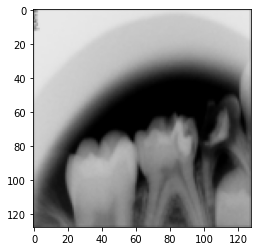

In [52]:
aug = iaa.BlendAlpha((0.0, 1.0), iaa.Grayscale(1.0))
aug_images = aug(images = normal_imgss)
plt.imshow(aug_images[0],cmap="gray")
normal_image , normal_mask = add_augmented_data(normal_imgss, aug_images ,normal_mask)
print(len(normal_image) , len(normal_mask))

In [41]:
aug = iaa.Sequential([
    iaa.MultiplyAndAddToBrightness(mul=(0.5, 1.5), add=(-30, 30))
])
aug_images = aug(images = normal_image)
plt.imshow(aug_images[0])
normal_image , normal_mask = add_augmented_data(normal_image , aug_images , normal_mask)
print(len(normal_image) , len(normal_mask))

ValueError: Got dtype 'float32', which is a forbidden dtype (bool, uint16, uint32, uint64, uint128, uint256, int32, int64, int128, int256, float16, float32, float64, float96, float128, float256).

In [53]:
np.save("aug_images_train.npy",normal_image)
np.save("aug_label_train.npy",normal_mask)

: 

In [42]:
normal_image = np.load("./images_test.npy")
normal_imgss = [np.dstack((normal_image[i], normal_image[i], normal_image[i])) for i in range(0,len(normal_image))]
# imgss = [np.stack((imgs[i], imgs[i], imgs[i]), axis=2) for i in range(0,len(imgs_test))]
np.save("images_test_3d.npy", normal_imgss)